In [ ]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np

# **Data Train**

#### Read Data Application Train

In [ ]:
app_train=pd.read_csv('application_train.csv')

## **EDA**

### Repayment Abilities Distribution

In [ ]:
target_map={0:"Payment Difficulties", 1:'No Payment Difficulties'}
def target_stat(label):
  return target_map[int(label)]

app_train.TARGET=app_train.TARGET.apply(lambda x: target_stat(x))

Text(0.5, 1.05, 'Percentage of Payment Difficulties')

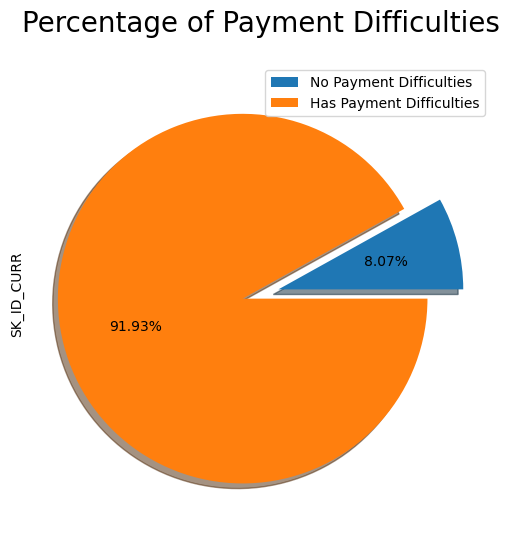

In [ ]:
ax = app_train.groupby(['TARGET']).count().plot(kind = 'pie', y = 'SK_ID_CURR',
                                                autopct = '%1.2f%%',
                                                explode = (0.1, 0.1), shadow = True, labels = None, figsize = (12,6))
plt.legend(['No Payment Difficulties', 'Has Payment Difficulties'], loc = 'upper right', prop = {'size': 10})

plt.title('Percentage of Payment Difficulties', size = 20, y = 1.05)

### Categorical and Target

##### Target vs Car, Realty, Contract Type

In [ ]:
app_train['FLAG_OWN_CAR']=app_train['FLAG_OWN_CAR'].replace(['N','Y'], ['No', 'Yes'])
app_train['FLAG_OWN_REALTY']=app_train['FLAG_OWN_REALTY'].replace(['N','Y'], ['No', 'Yes'])

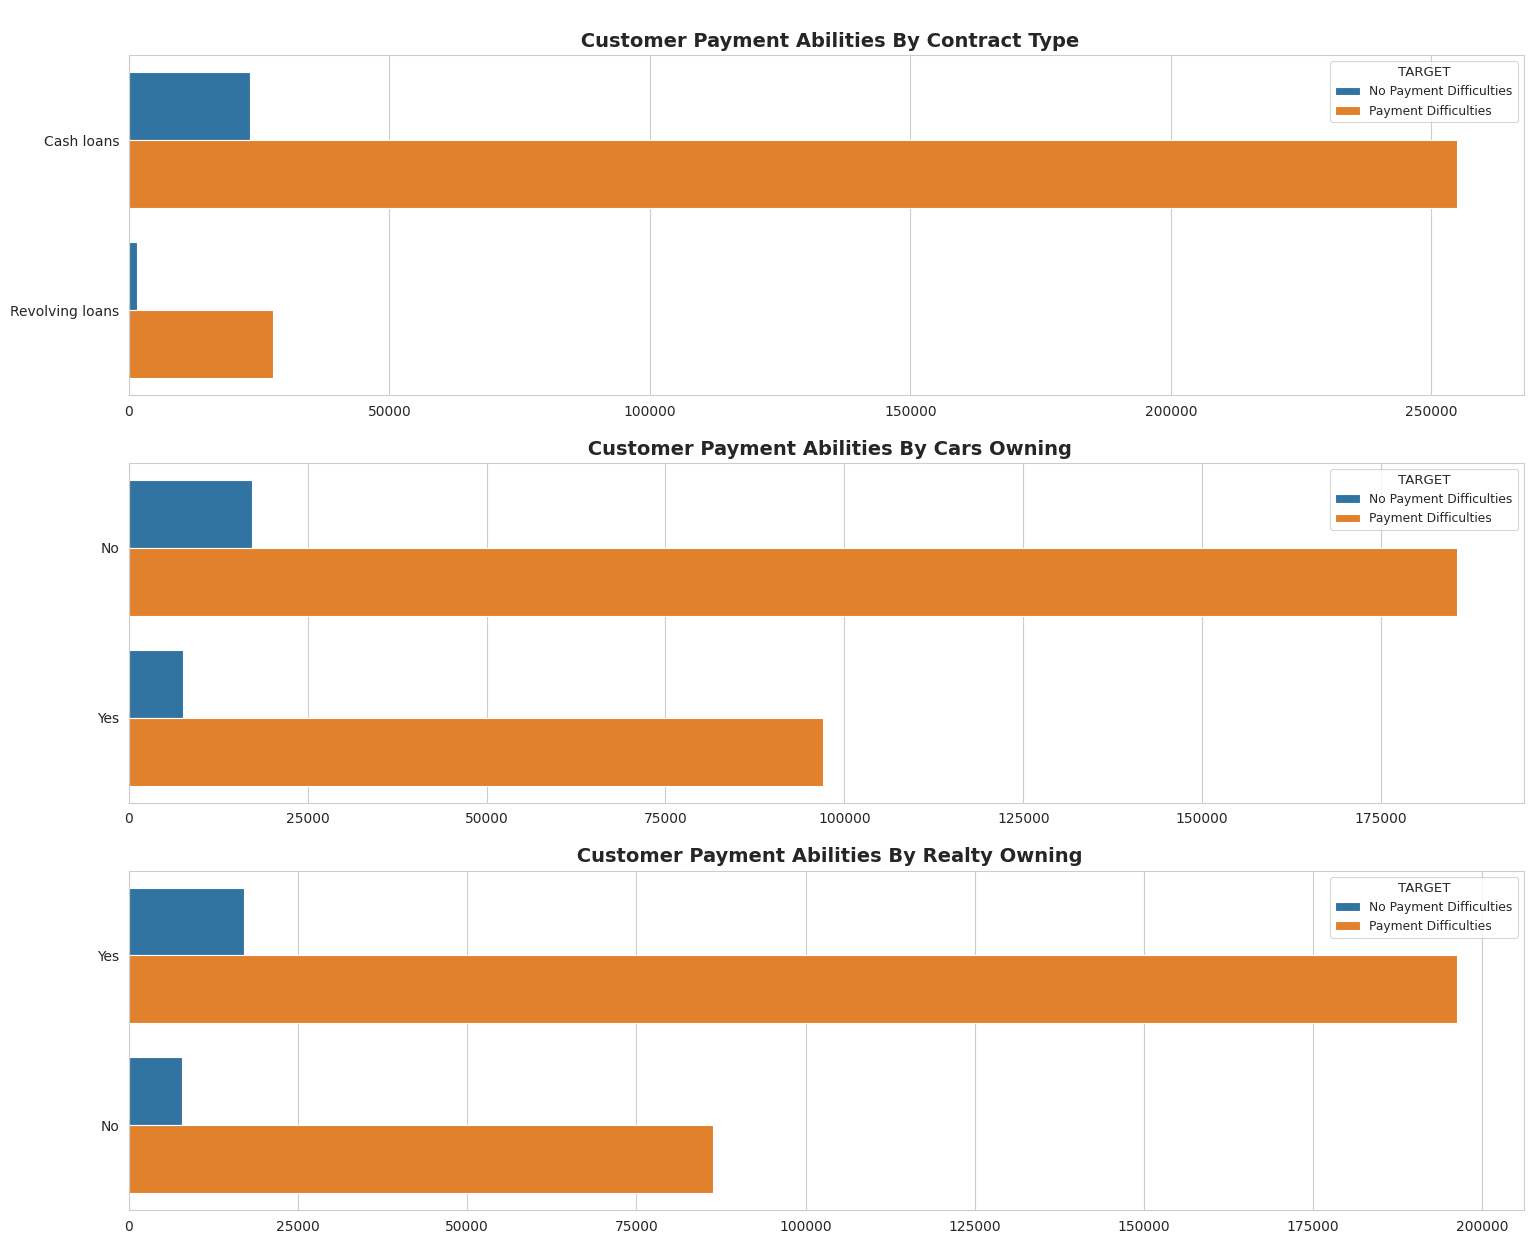

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(3, figsize = (18,15))
sns.set_context('paper', font_scale = 1)

cat1=['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
cat1_title=['Contract Type', 'Cars Owning', 'Realty Owning']
for i in range(0,3):
  ax[i].set_title(f'\n Customer Payment Abilities By {cat1_title[i]}', fontweight='bold', fontsize=14)
  sns.countplot(y=cat1[i], data = app_train, hue = 'TARGET', ax=ax[i])
  ax[i].set_xlabel('')
  ax[i].set_ylabel('')
  ax[i].tick_params(axis='both', which='major', labelsize=10)

##### Target vs Income Type, Education Type, Family Status, Housing Type, Occupation

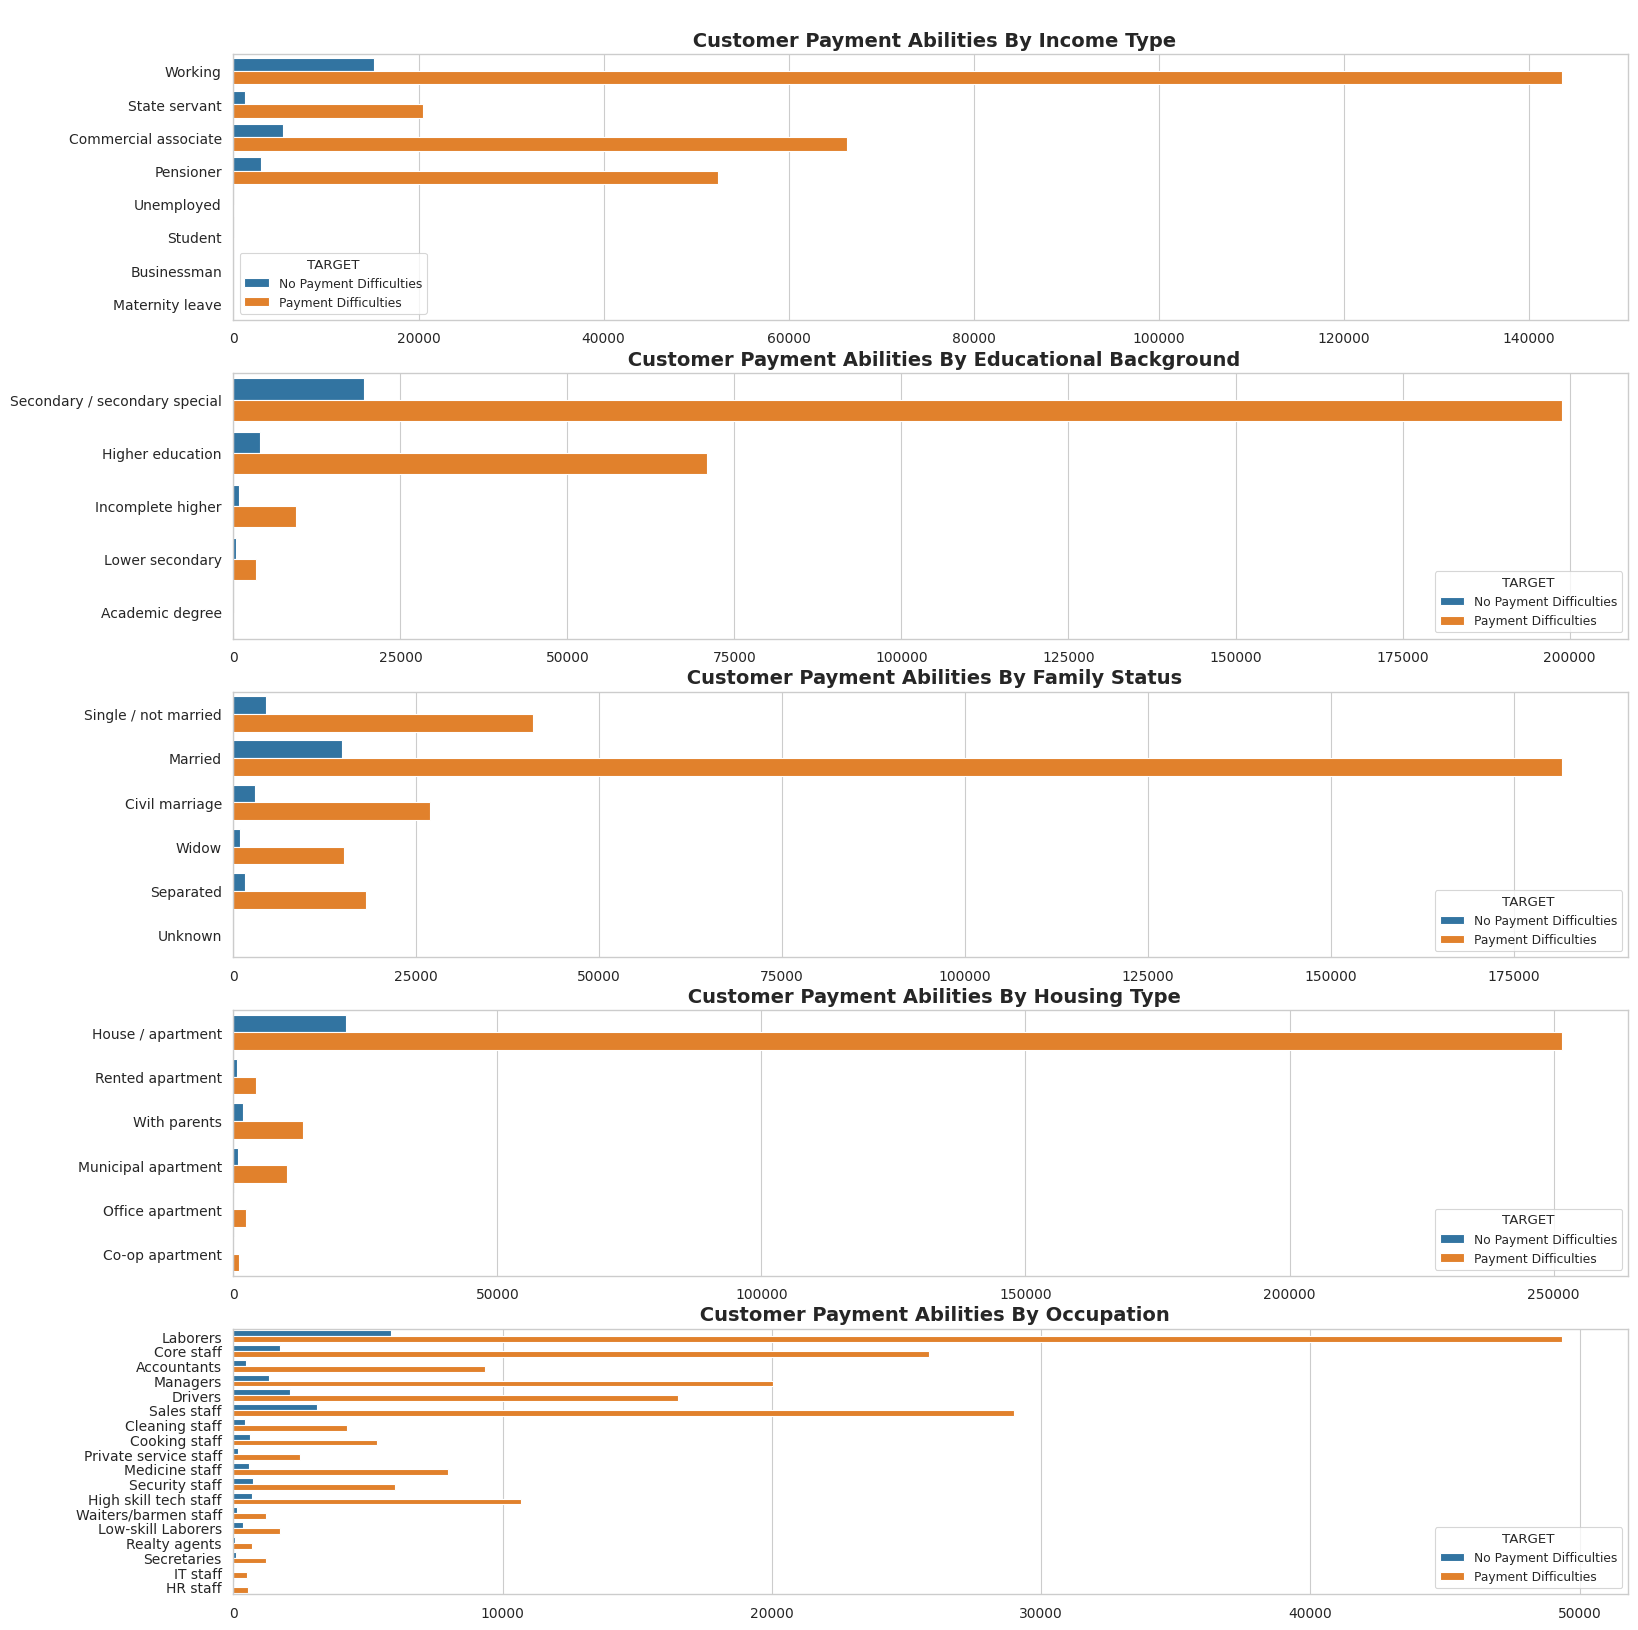

In [ ]:
cat2=['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
cat2_title=['Income Type', 'Educational Background', 'Family Status', 'Housing Type', 'Occupation']

sns.set_style('whitegrid')
fig, ax = plt.subplots(5, figsize = (18,20))
sns.set_context('paper', font_scale = 1)

for i in range(0,5):
  ax[i].set_title(f'\n Customer Payment Abilities By {cat2_title[i]}', fontweight='bold', fontsize=14)
  sns.countplot(y=cat2[i], data = app_train, hue = 'TARGET', ax=ax[i])
  ax[i].set_xlabel('')
  ax[i].set_ylabel('')
  ax[i].tick_params(axis='both', which='major', labelsize=10)

### Numerical vs Target

##### Target vs Amount Credit, Annuity, and Goods Price

In [ ]:
num1=['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
num1_title=['Credit Loaned', 'Credit Annuity', 'Goods Price']

In [ ]:
no_targ=app_train.loc[app_train['TARGET']=='No Payment Difficulties']
yes_targ=app_train.loc[app_train['TARGET']=='Payment Difficulties']

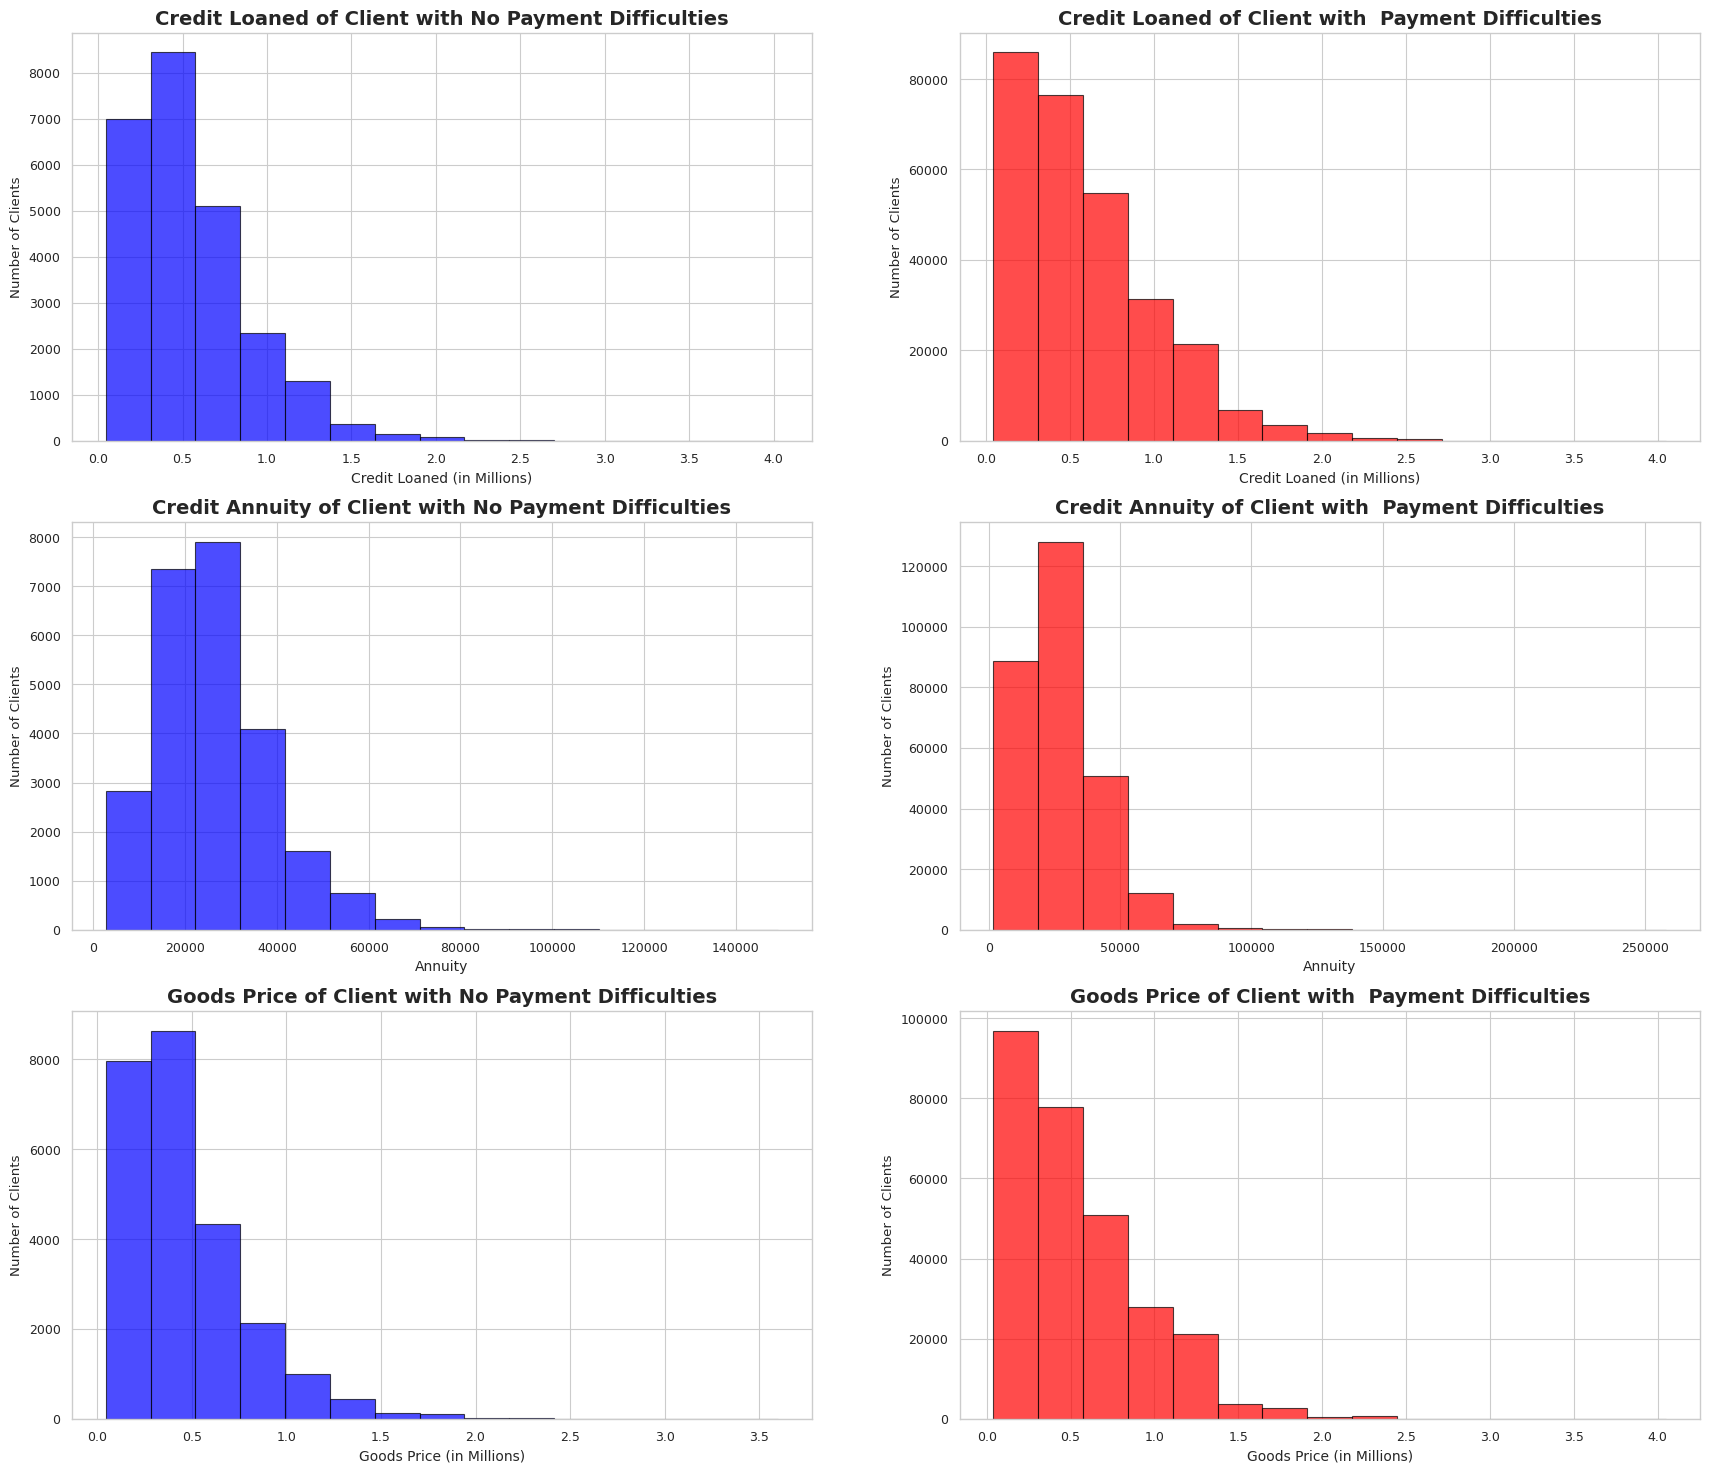

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(len(num1),2, figsize = (21,18))
sns.set_context('paper', font_scale = 1)

for i in range(0,len(num1)):
  ax[i][0].set_title(f'{num1_title[i]} of Client with No Payment Difficulties', fontweight='bold', fontsize=14)
  ax[i][1].set_title(f'{num1_title[i]} of Client with  Payment Difficulties', fontweight='bold', fontsize=14)
  ax[i][0].hist(no_targ[num1[i]], bins = 15,  color='blue', edgecolor='black', alpha=0.7)
  ax[i][1].hist(yes_targ[num1[i]], bins = 15, color='red', edgecolor='black', alpha=0.7)
  for j in range(0,2):
    ax[i][j].set_ylabel('Number of Clients')
    ax[i][j].xaxis.get_offset_text().set_visible(False)
    ax[i][j].tick_params(axis='both', which='major', labelsize=9)
    ax[0][j].set_xlabel('Credit Loaned (in Millions)', fontsize=10)
    ax[1][j].set_xlabel('Annuity', fontsize=10)
    ax[2][j].set_xlabel('Goods Price (in Millions)', fontsize=10)

##### Target vs Age

In [ ]:
age_targ=app_train[['TARGET','SK_ID_CURR','DAYS_BIRTH']]
age_targ['AGE']=age_targ['DAYS_BIRTH']/(-365)
age_targ['AGE'].describe()

<ipython-input-13-7bf76945f309>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_targ['AGE']=age_targ['DAYS_BIRTH']/(-365)


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: AGE, dtype: float64

In [ ]:
def age_group(x):
  if x<30:
    clust='20s'
  elif 30<=x<40:
    clust='30s'
  elif 40<=x<50:
    clust='40s'
  elif 50<=x<60:
    clust='50s'
  else:
    clust='60s'
  return clust
age_targ['CATEGORIES']=age_targ['AGE'].apply(lambda x: age_group(x))
display(age_targ.head())

<ipython-input-14-4531a5f99c9b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_targ['CATEGORIES']=age_targ['AGE'].apply(lambda x: age_group(x))


,TARGET,SK_ID_CURR,DAYS_BIRTH,AGE,CATEGORIES
0,No Payment Difficulties,100002,-9461,25.920548,20s
1,Payment Difficulties,100003,-16765,45.931507,40s
2,Payment Difficulties,100004,-19046,52.180822,50s
3,Payment Difficulties,100006,-19005,52.068493,50s
4,Payment Difficulties,100007,-19932,54.608219,50s


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]),
 [Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000'),
  Text(0, 50000.0, '50000'),
  Text(0, 60000.0, '60000'),
  Text(0, 70000.0, '70000'),
  Text(0, 80000.0, '80000')])

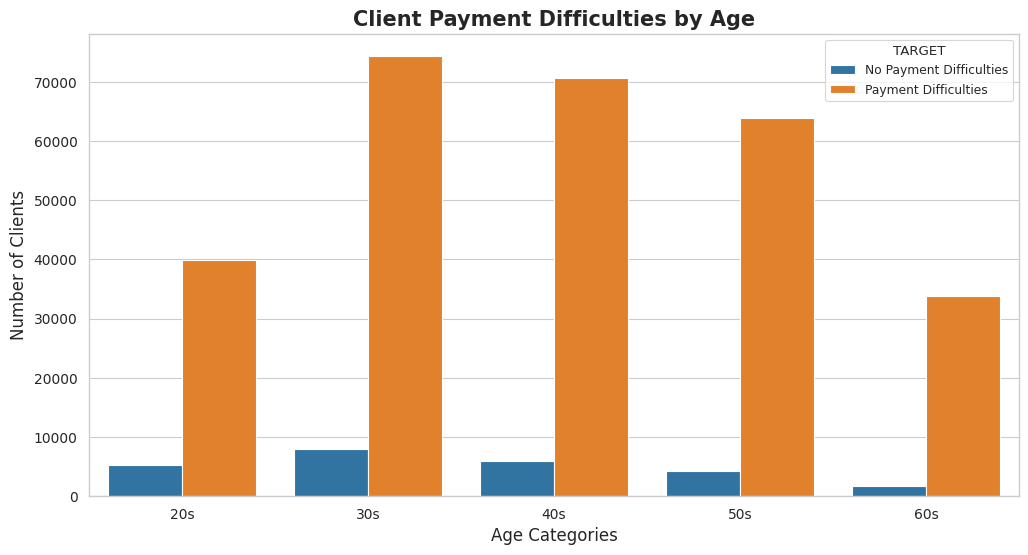

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='CATEGORIES', data=age_targ, hue='TARGET', order=['20s','30s','40s','50s','60s'])
plt.title('Client Payment Difficulties by Age', fontsize=15, fontweight='bold')
plt.xlabel('Age Categories', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

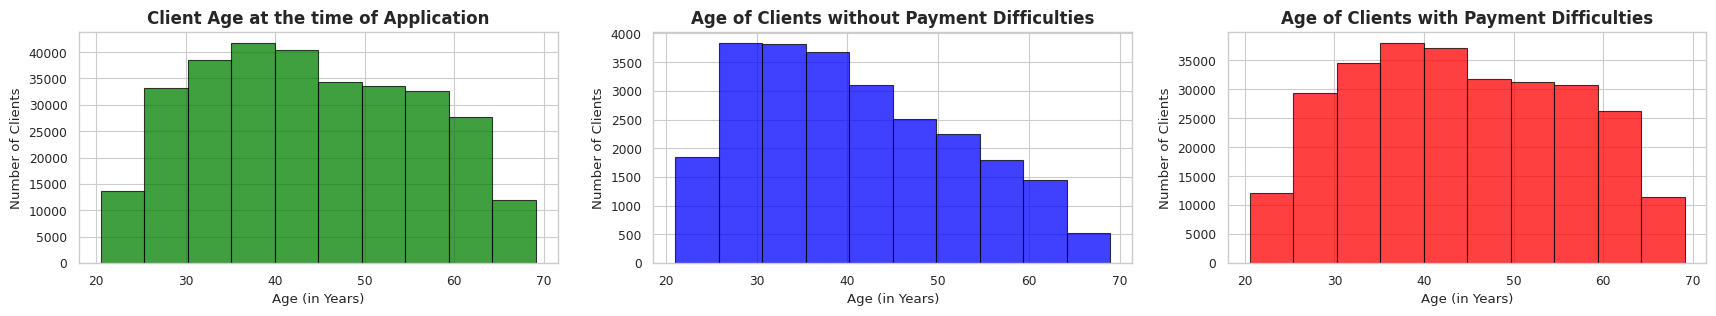

In [ ]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,3, figsize = (21,3))
sns.set_context('paper', font_scale = 1)
ax[0].set_title('Client Age at the time of Application', fontweight='bold', fontsize=12)
ax[0].hist(app_train['DAYS_BIRTH'].values/-365, bins=10, color='g', edgecolor='black', alpha=0.75)
ax[1].set_title('Age of Clients without Payment Difficulties', fontweight='bold', fontsize=12)
ax[1].hist(no_targ['DAYS_BIRTH'].values/-365, bins=10, color='b', edgecolor='black', alpha=0.75)
ax[2].set_title('Age of Clients with Payment Difficulties', fontweight='bold', fontsize=12)
ax[2].hist(yes_targ['DAYS_BIRTH'].values/-365, bins=10, color='r', edgecolor='black', alpha=0.75)

for i in range(0,3):
  ax[i].set_ylabel('Number of Clients')
  ax[i].set_xlabel('Age (in Years)')

##### Target vs Family Member

In [ ]:
fam_targ=pd.DataFrame({'TARGET': app_train.TARGET, 'Family Members':app_train.CNT_FAM_MEMBERS})
fam_targ.dropna(inplace=True)
fam_targ['Family Members']=fam_targ['Family Members'].astype('int64')

def more_four(x:int):
  if x>4:
    return ('More Than Four')
  else:
    return x

fam_targ['Family Members']=fam_targ['Family Members'].apply(lambda x: more_four(x))

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(0, 1, '2'),
  Text(0, 2, '3'),
  Text(0, 3, '4'),
  Text(0, 4, 'More Than Four')])

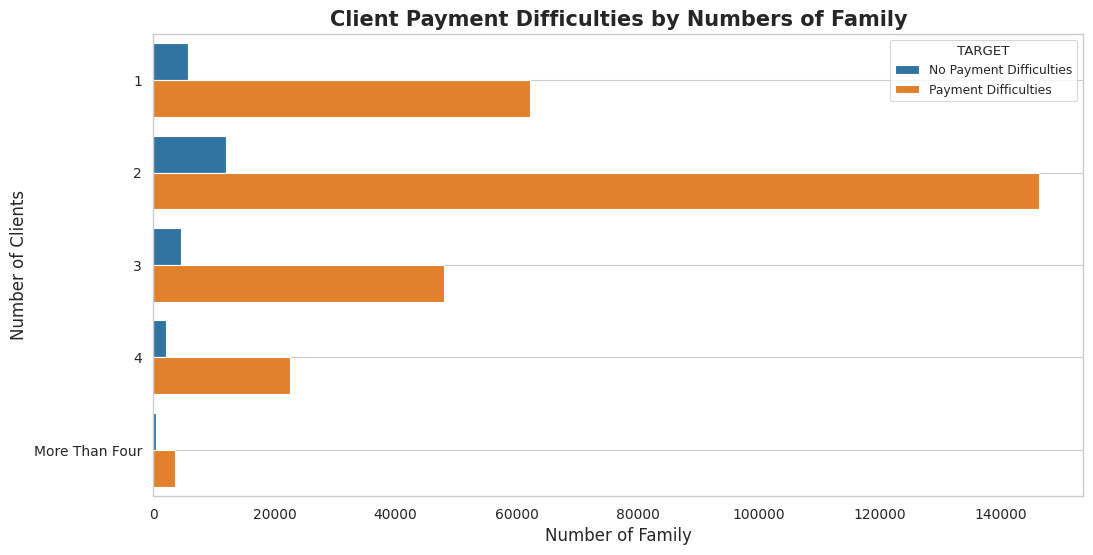

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y='Family Members', data=fam_targ, hue='TARGET', orient='h')
plt.title('Client Payment Difficulties by Numbers of Family', fontsize=15, fontweight='bold')
plt.grid()
plt.xlabel('Number of Family', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

Text(0.5, 1.0, 'Family Size of Client with No Payment Difficulties')

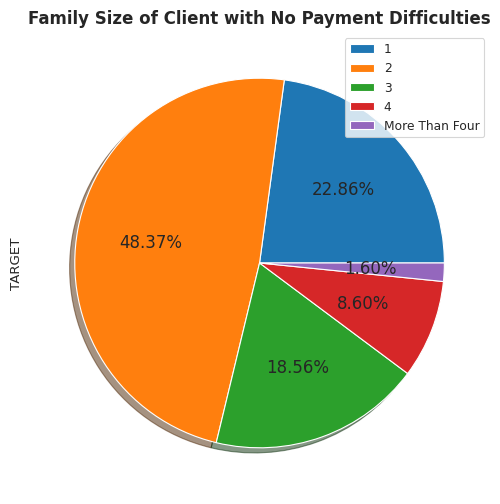

In [ ]:
fam_targ.loc[fam_targ['TARGET']=='No Payment Difficulties'].groupby(['Family Members']).count().plot(kind = 'pie', 
                                                y='TARGET', autopct = '%1.2f%%',
                                                shadow = True, labels = None, figsize = (12,6), fontsize=12)
plt.title('Family Size of Client with No Payment Difficulties', fontweight='bold', fontsize=12)

Text(0.5, 1.0, 'Family Size of Client with Payment Difficulties')

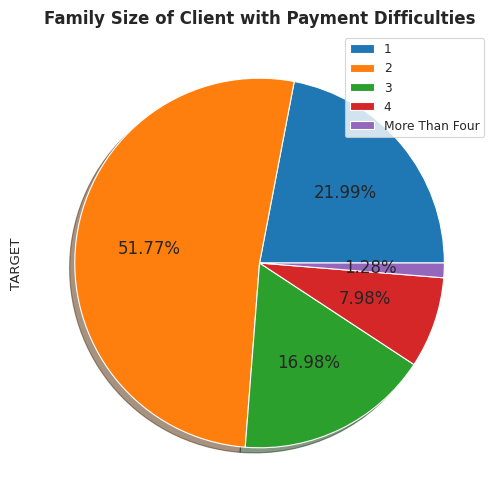

In [ ]:
fam_targ.loc[fam_targ['TARGET']=='Payment Difficulties'].groupby(['Family Members']).count().plot(kind = 'pie', 
                                                y='TARGET', autopct = '%1.2f%%',
                                                shadow = True, labels = None, figsize = (12,6), fontsize=12)
plt.title('Family Size of Client with Payment Difficulties', fontweight='bold', fontsize=12)

## **Cleaning & Pre-Processing**

##### Missing Value Distribution

,colnames,null_pct
0,COMMONAREA_MEDI,69.87
1,COMMONAREA_AVG,69.87
2,COMMONAREA_MODE,69.87
3,NONLIVINGAPARTMENTS_MODE,69.43
4,NONLIVINGAPARTMENTS_AVG,69.43
...,...,...
117,NAME_FAMILY_STATUS,0.00
118,NAME_EDUCATION_TYPE,0.00
119,NAME_INCOME_TYPE,0.00
120,AMT_ANNUITY,0.00


<Axes: ylabel='Frequency'>

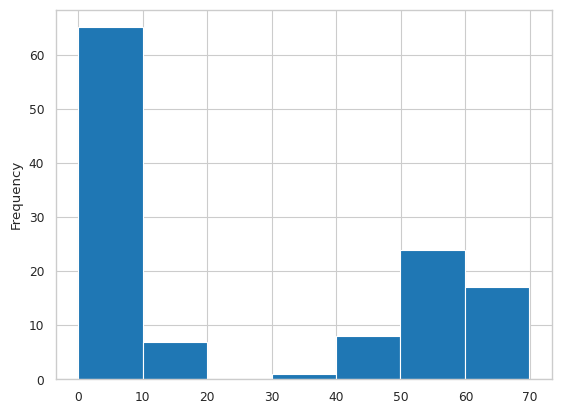

In [ ]:
def percentMiss(df):
  colnames=df.columns
  count_null=[]
  for i in df.columns:
    count_null.append(round((df[i].isna().sum()/df.shape[0]) * 100, 2))
  null_values_count = pd.DataFrame(dict(colnames=colnames, null_pct=count_null))
  return null_values_count.sort_values(by='null_pct', ascending=False).reset_index(drop=True)

display(percentMiss(app_train))
percentMiss(app_train)['null_pct'].plot(kind='hist', bins=7)

In [ ]:
#remove >25 missing values
less_25=percentMiss(app_train).loc[percentMiss(app_train)['null_pct']<=25]
used_columns=list(less_25['colnames'])

clean_1=app_train[used_columns]

In [ ]:
miss_col=list(clean_1.isna().sum().loc[lambda x: x>0].index)
clean_1[miss_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EXT_SOURCE_3                246546 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
 6   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
 7   NAME_TYPE_SUITE             306219 non-null  object 
 8   DEF_30_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 9   OBS_30_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 10  OBS_60_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 11  DEF_60_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 12  EXT_SOURCE_2                306851 non-null  float64
 13  AMT_GOODS_PRIC

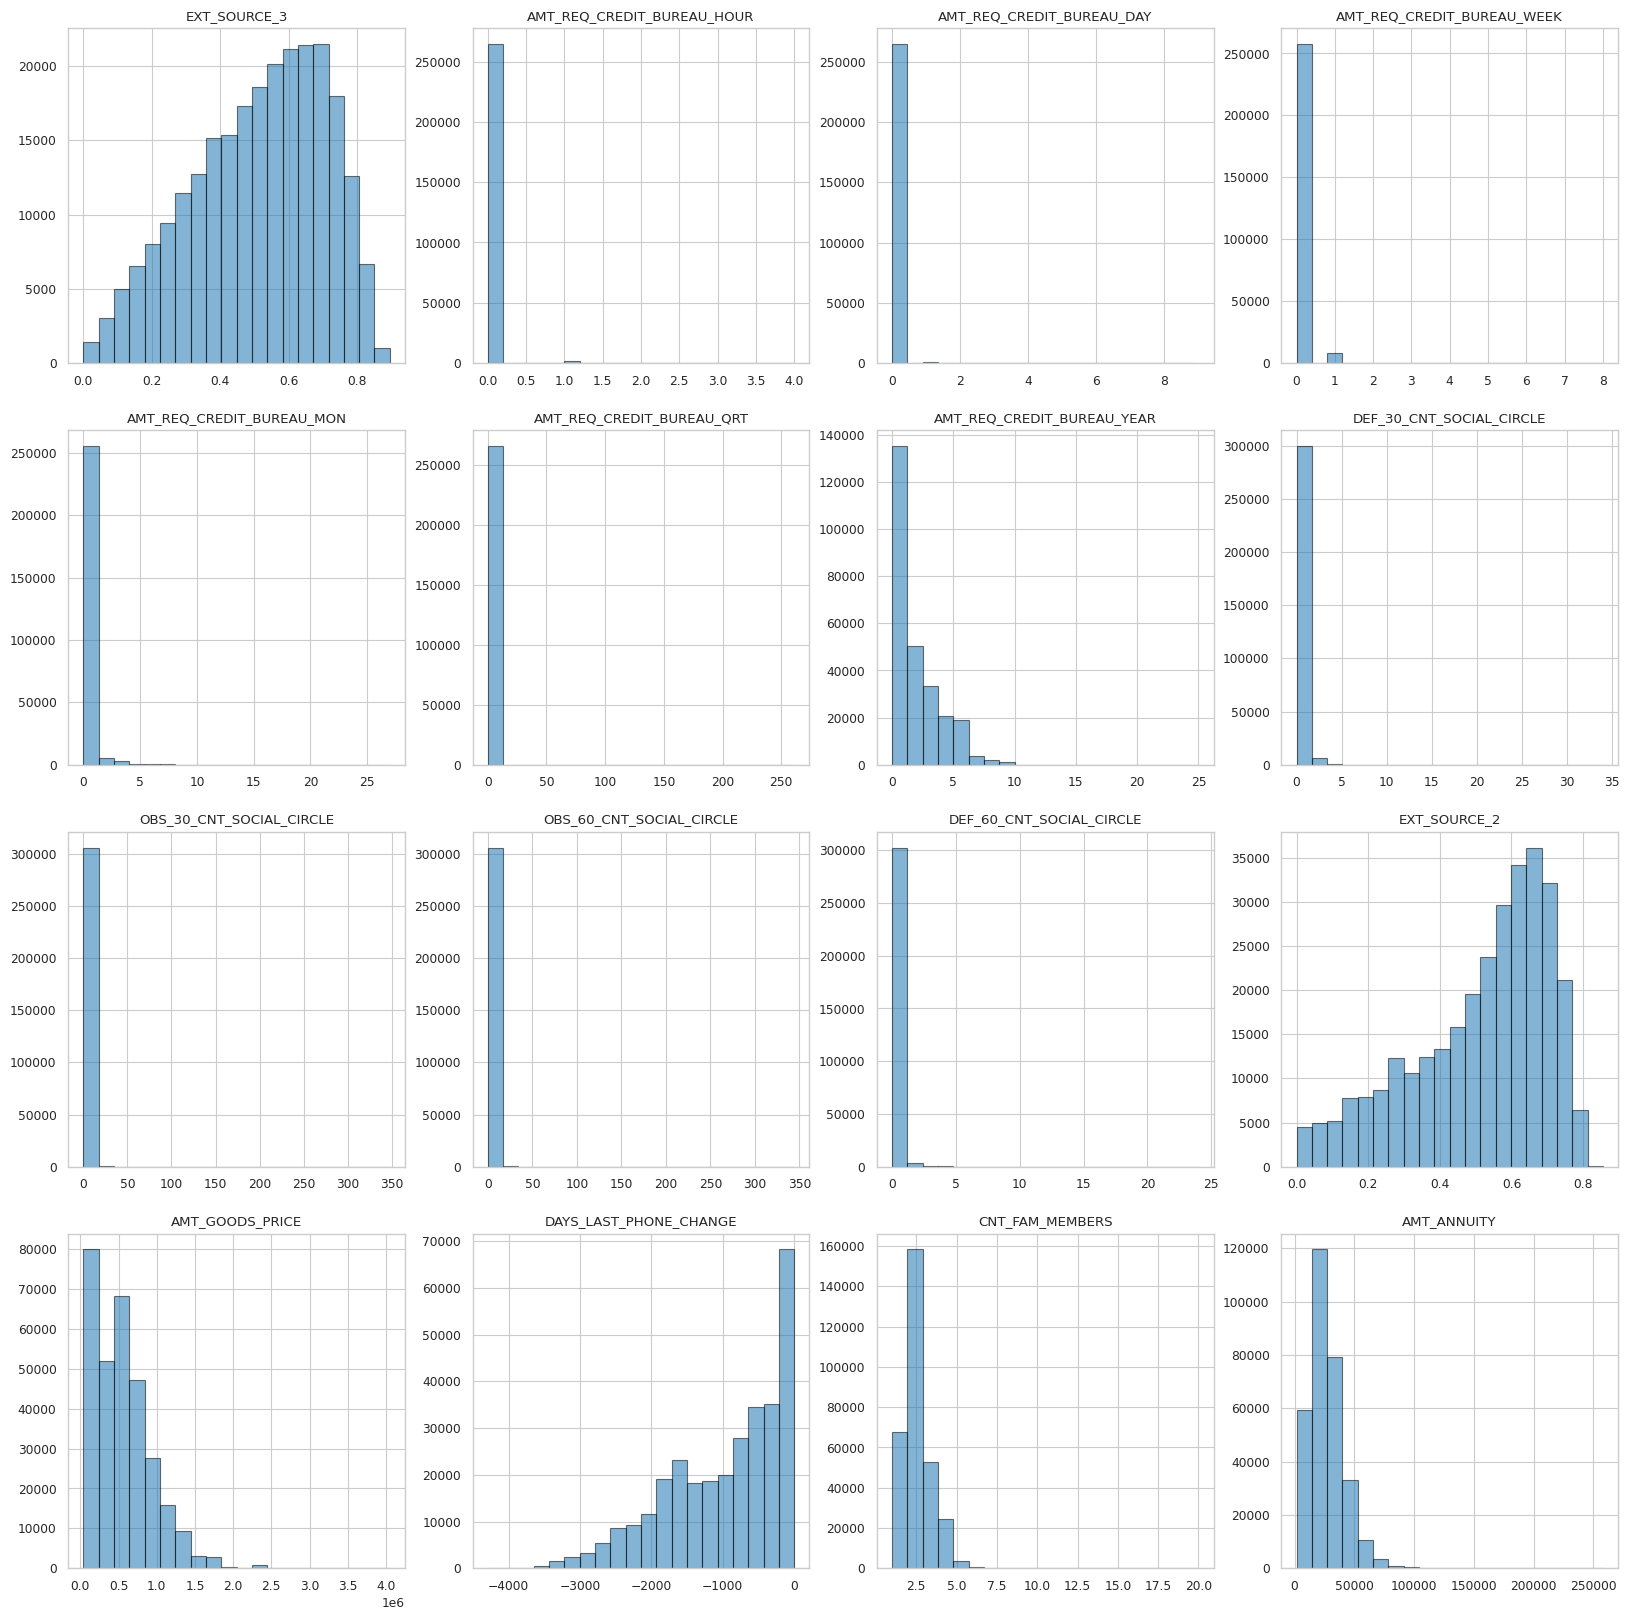

In [ ]:
num_miss = clean_1[miss_col].select_dtypes(exclude = ['object']).columns.tolist()
sns.set_style('whitegrid')
fig, ax = plt.subplots(4,4, figsize = (20,20))
sns.set_context('paper', font_scale = 1)

for i in range(0,4):
  for j in range(0,4):
    ax[i][j].hist(clean_1[num_miss[4*i+j]], bins=20, edgecolor='black', alpha=0.55)
    ax[i][j].set_title(f'{num_miss[4*i+j]}')

##### Handling Missing Values

In [ ]:
clean_2=clean_1.copy(deep=True)
num_clean2=clean_2.select_dtypes(exclude = ['object']).columns.tolist()
cat_clean2=clean_2.select_dtypes(include = ['object']).columns.tolist()

for col in clean_2:
  if clean_2[col].isnull().any():
    if (col in num_clean2):
      clean_2[col].fillna(clean_2[col].median(), inplace=True)
    else:
      clean_2[col].fillna(clean_2[col].mode()[0],inplace=True)

sum(clean_2.isnull().sum()) #check if there any null values left. 0= no null values

0

##### Detecting Numerical Outliers

In [ ]:
#Checking Numerical Data which not Uniformed
num_clean2=clean_2.select_dtypes(include = ['int64','float64']).columns.tolist()
not_uniform=[]
for i in num_clean2:
  if (clean_2[i].nunique()>2):
    not_uniform.append(i)
len(not_uniform)

28

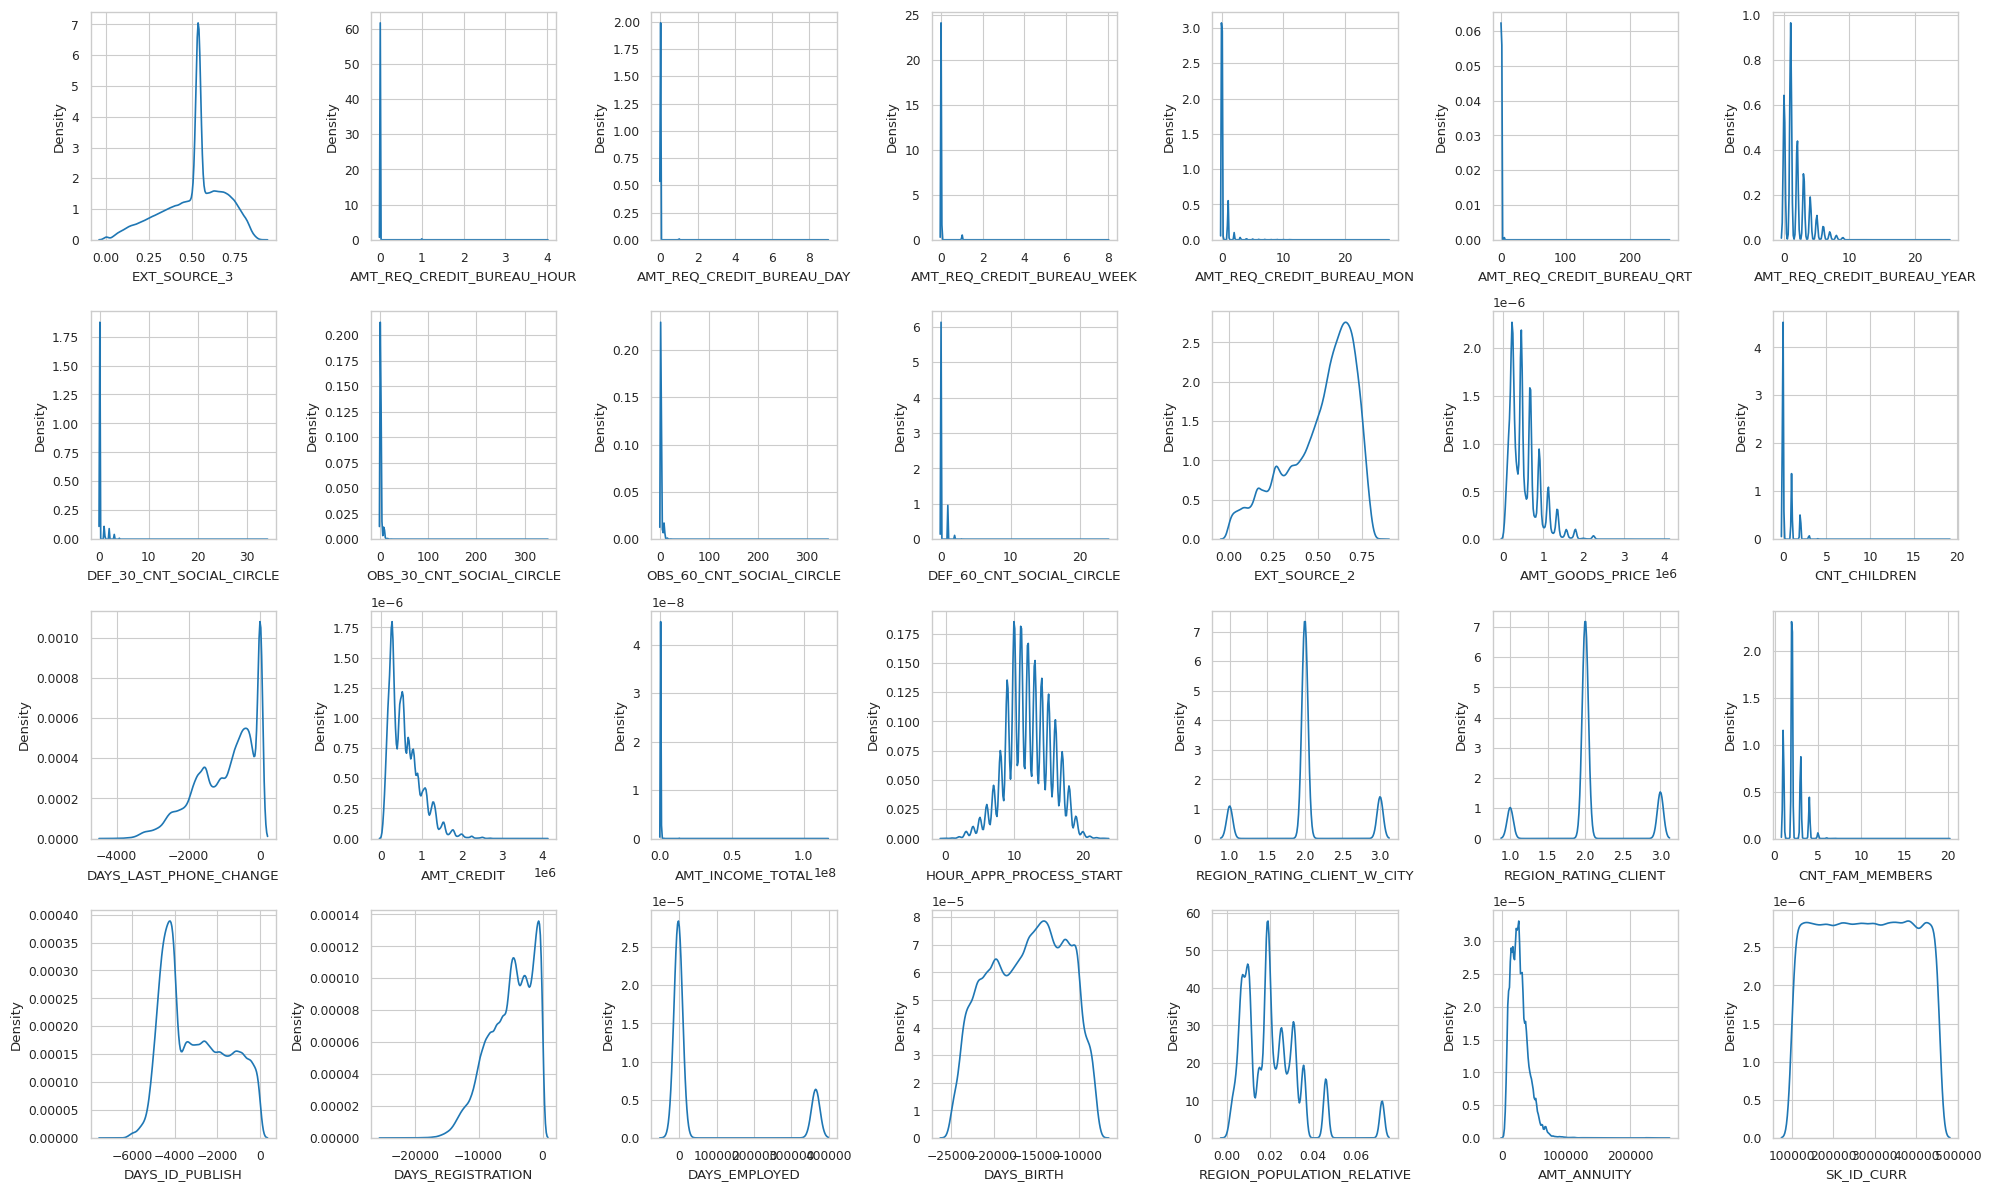

In [ ]:
#Distribution of Non-Uniform Numerical Data
plt.figure(figsize = (20,12))
for i, column in enumerate (clean_2[not_uniform].columns, 1):
    plt.subplot(4,7,i)
    sns.kdeplot(data = clean_2[not_uniform], x = clean_2[column])
    plt.tight_layout()

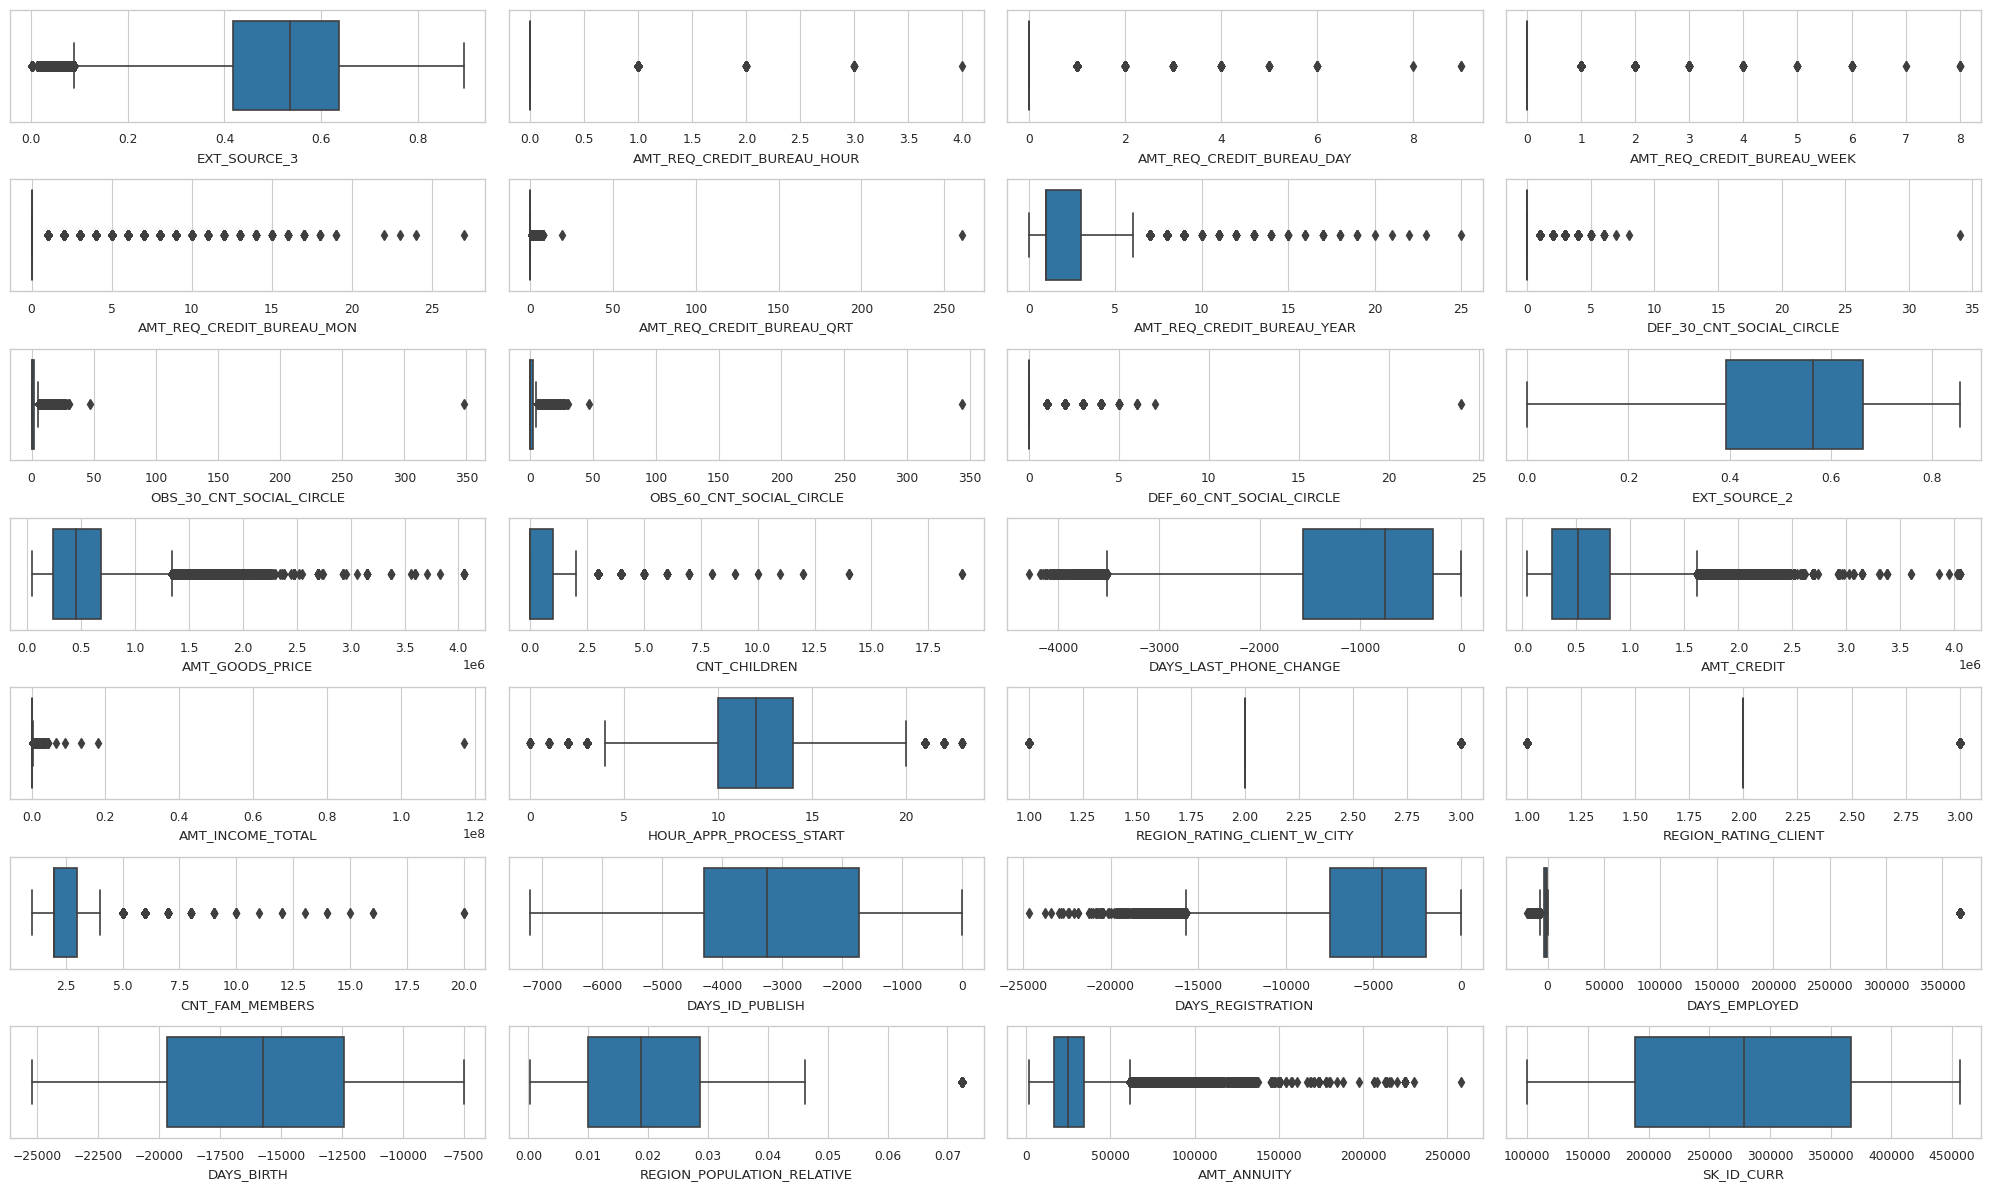

In [ ]:
plt.figure(figsize = (20,12))

for i, column in enumerate (clean_2[not_uniform].columns, 1):
    plt.subplot(7,4,i)
    sns.boxplot(data = clean_2[not_uniform], x = clean_2[column])
    plt.tight_layout()

## **Machine Learning**

### Pre-Model

##### Fixed Data

In [ ]:
train_clean=clean_2[clean_2.columns[::-1]].copy(deep=True)
num_var_new=train_clean.select_dtypes(include = ['int64','float64']).columns.tolist()
cat_var_new=train_clean.select_dtypes(include = ['object']).columns.tolist()

##### Import Library

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2
from sklearn.utils import resample #re-sampling
from sklearn.model_selection import train_test_split #data splitting
from sklearn.preprocessing import StandardScaler #normalize features

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score #roc score

##### One-Hot Encoding

In [ ]:
train_clean[cat_var_new] = train_clean[cat_var_new].apply(LabelEncoder().fit_transform)
train_clean.head(2)

,SK_ID_CURR,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,NAME_TYPE_SUITE,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,EXT_SOURCE_3
0,100002,24700.5,7,4,3,1,0.018801,-9461,-637,-3648.0,...,2.0,2.0,6,1.0,0.0,0.0,0.0,0.0,0.0,0.139376
1,100003,35698.5,4,1,1,1,0.003541,-16765,-1188,-1186.0,...,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.535276


##### Feature Selection

In [ ]:
#Remove ID
train_clean.drop(['SK_ID_CURR'], inplace=True, axis=1)
#Made negative value positive
train_clean=train_clean.abs()

In [ ]:
x = train_clean.drop(['TARGET'], axis = 1)
y = train_clean['TARGET']


best_features = SelectKBest(score_func = chi2, k = 10)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)
feature_scores = pd.concat([df_columns, df_scores], axis = 1)
feature_scores.columns = ['Features', 'Score']
feature_scores.sort_values(by = ['Score'], ascending = False).reset_index(drop=True).head()

,Features,Score
0,DAYS_EMPLOYED,1.954124e+08
1,AMT_GOODS_PRICE,1.223080e+08
2,AMT_CREDIT,7.669987e+07
3,DAYS_BIRTH,2.235391e+06
4,AMT_INCOME_TOTAL,1.624102e+06


##### Heading Imbalance Data

In [ ]:
train_clean[(train_clean['TARGET'] == 1)].shape

(282686, 71)

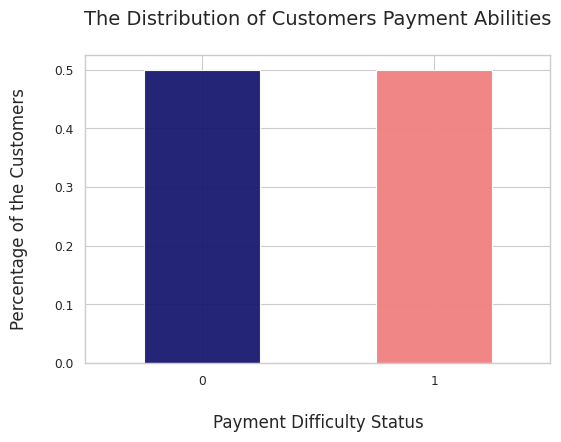

In [ ]:
# Create two different dataframe of majority and minority class 
df_major = train_clean[(train_clean['TARGET'] == 1)] 
df_minor = train_clean[(train_clean['TARGET'] == 0)] 

# Upsampled minority class
df_minor_upsampled = resample(df_minor,
                              replace = True,    # sample with replacement
                              n_samples = df_major.shape[0], # to match majority class
                              random_state = 42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minor_upsampled, df_major])

# Plotting
fig = plt.figure(figsize = (6,4))
df_upsampled['TARGET'].value_counts(normalize=True).plot(kind = 'bar',
                                                         color = ['midnightblue','lightcoral'],
                                                         alpha = 0.95,
                                                         rot = 0)
plt.title('The Distribution of Customers Payment Abilities\n', fontsize=14)
plt.ylabel('Percentage of the Customers\n', fontsize=12)
plt.xlabel('\nPayment Difficulty Status', fontsize=12)
plt.show()

##### Split Data (Train & Test)

In [ ]:
sorted_features=feature_scores.sort_values(by = ['Score'], ascending = False).reset_index(drop=True)

#select top 15 features
top15_col=list(sorted_features.iloc[:15]['Features'])

x_balanced = df_upsampled[top15_col]
y_balanced=df_upsampled['TARGET']

X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(452297, 15) (113075, 15)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### **MODEL BUILDING**
Algorithm used:


1. Logistic Regression
2. Gaussian Naive Bayes
3. Decision Tree
4. Random Forest
5. K-Nearest Neighbor
6. Neural Network

##### **1. Logistic Regression**

In [ ]:
logreg=LogisticRegression()
log_model=logreg.fit(X_train,y_train)
# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.64      0.61      0.63    226112
           1       0.63      0.66      0.65    226185

    accuracy                           0.64    452297
   macro avg       0.64      0.64      0.64    452297
weighted avg       0.64      0.64      0.64    452297



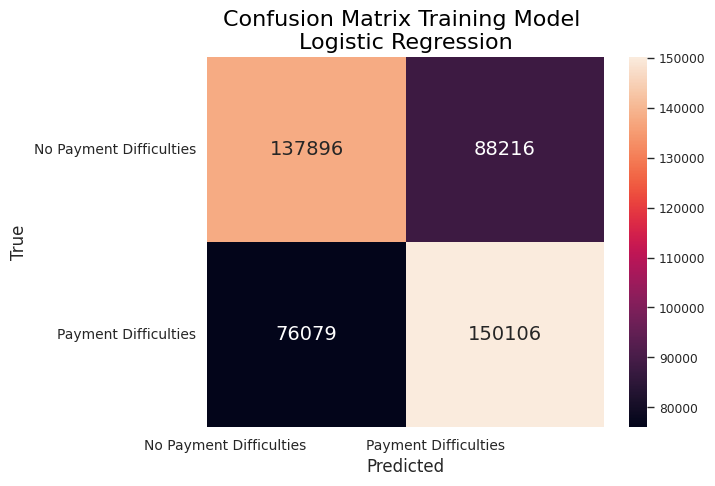

In [ ]:
#Confusion Matrix for Logistic Model
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix Training Model \nLogistic Regression', fontsize=16, color='black')
plt.ylabel('True', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.show()

In [ ]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.64      0.61      0.62     56574
           1       0.63      0.66      0.64     56501

    accuracy                           0.63    113075
   macro avg       0.63      0.63      0.63    113075
weighted avg       0.64      0.63      0.63    113075



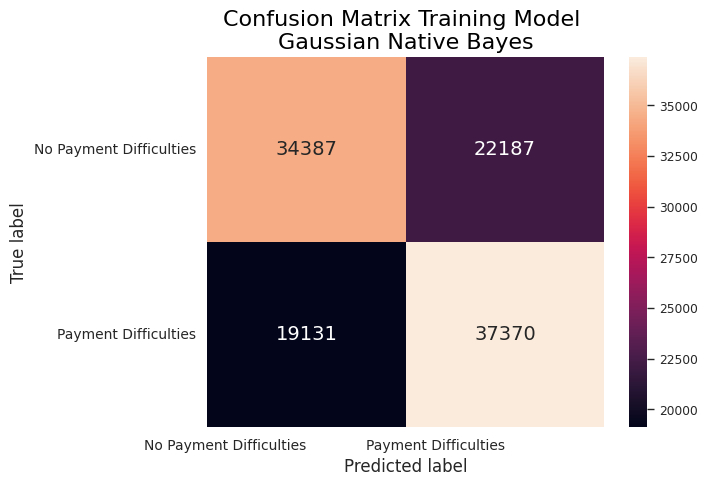

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix Training Model \nGaussian Native Bayes', fontsize=16, color='black')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print(f"Training Accuracy: {acc_log_train} %")
print(f"Test Accuracy: {acc_log_test} %")

# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_log),4)
print('ROC AUC:', roc_auc_log)

Training Accuracy: 63.68 %
Test Accuracy: 63.46 %
ROC AUC: 0.6346


##### **2. Gaussian Native Bayes**

In [ ]:
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)

y_train_pred_gnb = gnb_model.predict(X_train) # predict data train

# print classification report
print('Classification Report Training Model (Gaussian Naive Bayes):')
print(classification_report(y_train, y_train_pred_gnb))

GaussianNB()
Classification Report Training Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.68      0.30      0.41    226112
           1       0.55      0.86      0.67    226185

    accuracy                           0.58    452297
   macro avg       0.62      0.58      0.54    452297
weighted avg       0.62      0.58      0.54    452297



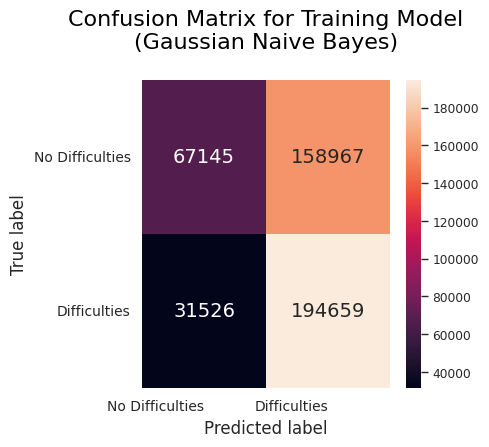

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gnb)), ('No Difficulties', 'Difficulties'), ('No Difficulties', 'Difficulties'))

# plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix for Training Model\n(Gaussian Naive Bayes)\n', fontsize=16, color='black')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
y_test_pred_gnb = gnb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Gaussian Naive Bayes):')
print(classification_report(y_test, y_test_pred_gnb))

Classification Report Testing Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.69      0.29      0.41     56574
           1       0.55      0.87      0.67     56501

    accuracy                           0.58    113075
   macro avg       0.62      0.58      0.54    113075
weighted avg       0.62      0.58      0.54    113075



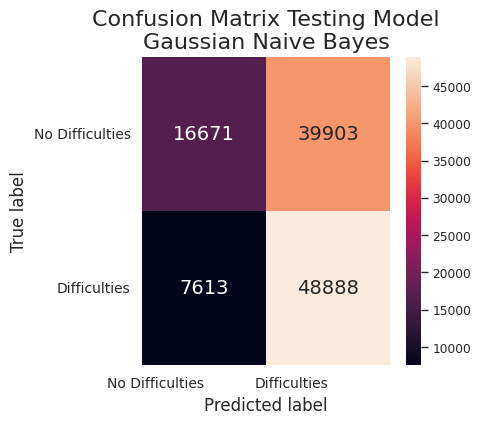

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gnb)), ('No Difficulties', 'Difficulties'), ('No Difficulties', 'Difficulties'))

# plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix Testing Model\nGaussian Naive Bayes', fontsize=16)
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
acc_nb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_nb_test=round(gnb_model.score(X_test,y_test)*100,2)
print(f"Training Accuracy: {acc_nb_train} %")
print(f"Test Accuracy: {acc_nb_test} %")

# ROC scores
roc_auc_gnb = round(roc_auc_score(y_test, y_test_pred_gnb),4)
print('ROC AUC:', roc_auc_gnb)

Training Accuracy: 57.88 %
Test Accuracy: 57.98 %
ROC AUC: 0.58


##### **3. Decision Tree**

In [ ]:
dt_model = DecisionTreeClassifier().fit(X_train,y_train)

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226112
           1       1.00      1.00      1.00    226185

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



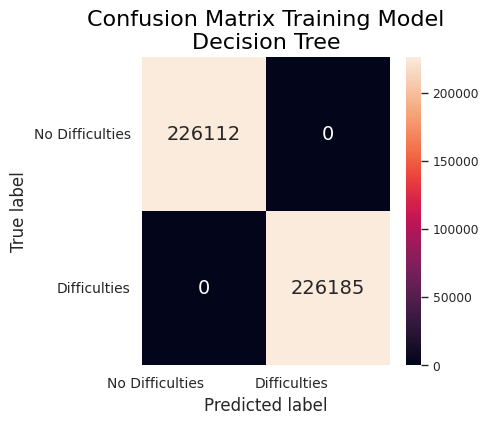

In [ ]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

#Confusion Matrix
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Difficulties', 'Difficulties'), ('No Difficulties', 'Difficulties'))

# plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix Training Model\nDecision Tree', fontsize=16, color='black')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.90      0.81      0.85     56574
           1       0.82      0.91      0.86     56501

    accuracy                           0.86    113075
   macro avg       0.86      0.86      0.86    113075
weighted avg       0.86      0.86      0.86    113075



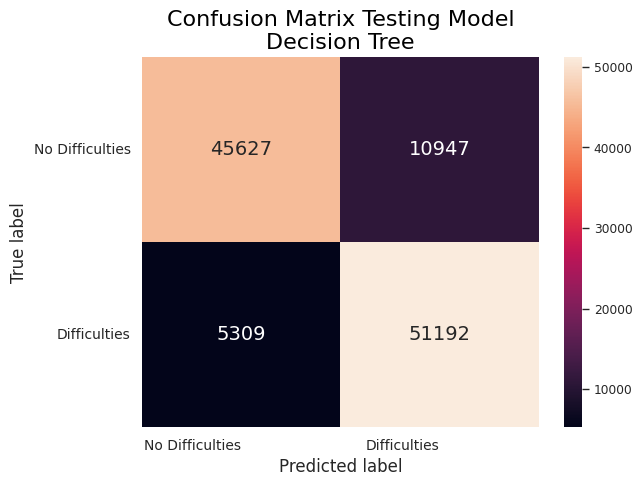

In [ ]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt))

#Confusion matrix
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('No Difficulties', 'Difficulties'), ('No Difficulties', 'Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix Testing Model\nDecision Tree', fontsize=16, color='black')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print(f"Training Accuracy: {acc_dt_train} %")
print(f"Test Accuracy: {acc_dt_test} %")

# ROC scores
roc_auc_dt = round(roc_auc_score(y_test, y_test_pred_dt),4)
print('ROC AUC:', roc_auc_dt)

Training Accuracy: 100.0 %
Test Accuracy: 85.62 %
ROC AUC: 0.8563


##### **4. Random Forest**

In [ ]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226112
           1       1.00      1.00      1.00    226185

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



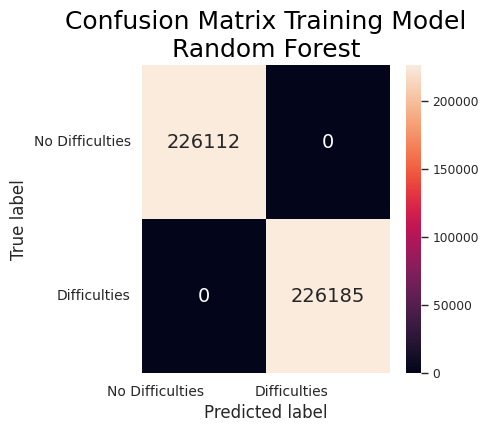

In [ ]:
y_train_pred_dt = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Difficulties', 'Difficulties'), ('No Difficulties', 'Difficulties'))

# plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix Training Model\nRandom Forest', fontsize=18, color='black')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     56574
           1       1.00      0.99      1.00     56501

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075



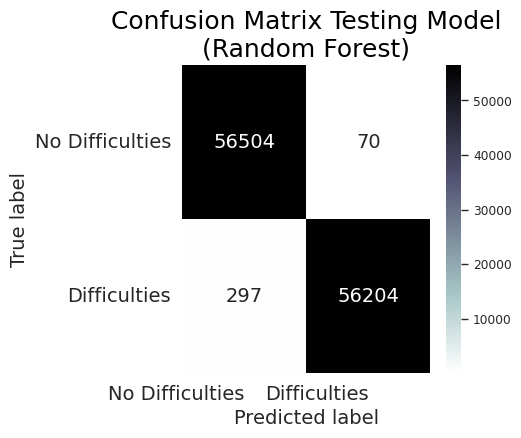

In [ ]:
y_test_pred_rf = rf_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('No Difficulties', 'Difficulties'), ('No Difficulties', 'Difficulties'))

# plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix Testing Model\n(Random Forest)', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print(f"Training Accuracy: {acc_rf_train} %")
print(f"Test Accuracy: {acc_rf_test} %")
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

Training Accuracy: 100.0 %
Test Accuracy: 99.68 %
ROC AUC: 0.9968


<ipython-input-59-8c4786d51e43>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


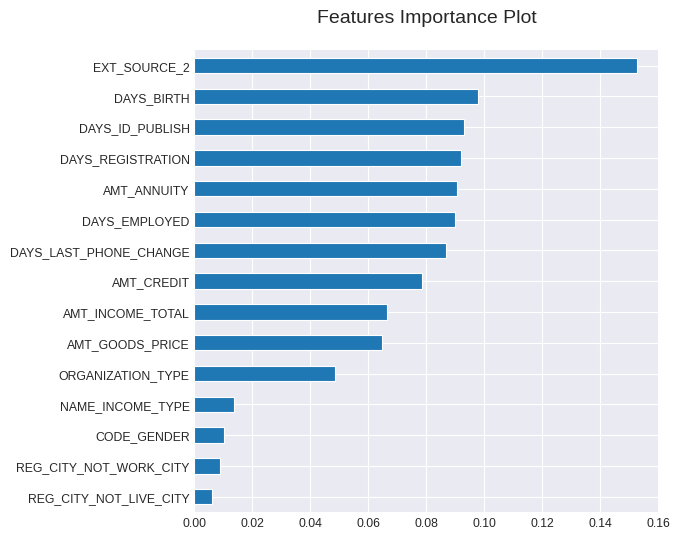

In [ ]:
# important features
importances_rf = pd.Series(rf_model.feature_importances_, index=x_balanced.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(6,6))
fig = importances_rf.plot(kind ='barh')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()

##### **5. K-Nearest Neighbor**

In [ ]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)

Classification Report Training Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.85      1.00      0.92    226112
           1       1.00      0.83      0.90    226185

    accuracy                           0.91    452297
   macro avg       0.93      0.91      0.91    452297
weighted avg       0.93      0.91      0.91    452297



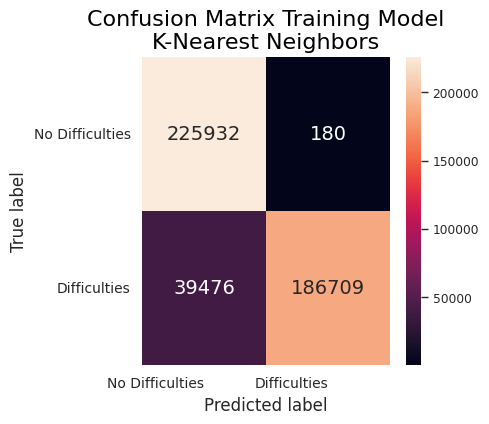

In [ ]:
y_train_pred_knn = knn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (K-Nearest Neighbors):')
print(classification_report(y_train, y_train_pred_knn))

confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_knn)),
                                    ('No Difficulties', 'Difficulties'), ('No Difficulties', 'Difficulties'))

# plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix Training Model\nK-Nearest Neighbors', fontsize=16, color='black')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

Classification Report Testing Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     56574
           1       0.99      0.75      0.86     56501

    accuracy                           0.87    113075
   macro avg       0.90      0.87      0.87    113075
weighted avg       0.90      0.87      0.87    113075



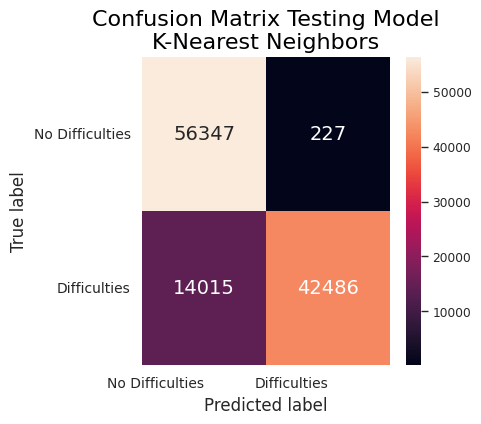

In [ ]:
# predict data test
y_test_pred_knn = knn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (K-Nearest Neighbors):')
print(classification_report(y_test, y_test_pred_knn))

confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_knn)), ('No Difficulties', 'Difficulties'), ('No Difficulties', 'Difficulties'))

# plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix Testing Model\nK-Nearest Neighbors', fontsize=16, color='black')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
acc_knn_train=round(knn_model.score(X_train,y_train)*100,2)
acc_knn_test=round(knn_model.score(X_test,y_test)*100,2)
print(f"Training Accuracy: {acc_knn_train} %")
print(f"Test Accuracy: {acc_knn_test} %")

roc_auc_knn = round(roc_auc_score(y_test, y_test_pred_knn),4)
print('ROC AUC:', roc_auc_knn)

Training Accuracy: 91.23 %
Test Accuracy: 87.4 %
ROC AUC: 0.874


##### **6. Neural Network**

In [ ]:
nn_model = MLPClassifier().fit(X_train, y_train)

Classification Report Training Model (Neural Network):
              precision    recall  f1-score   support

           0       0.67      0.65      0.66    226112
           1       0.66      0.68      0.67    226185

    accuracy                           0.67    452297
   macro avg       0.67      0.67      0.67    452297
weighted avg       0.67      0.67      0.67    452297



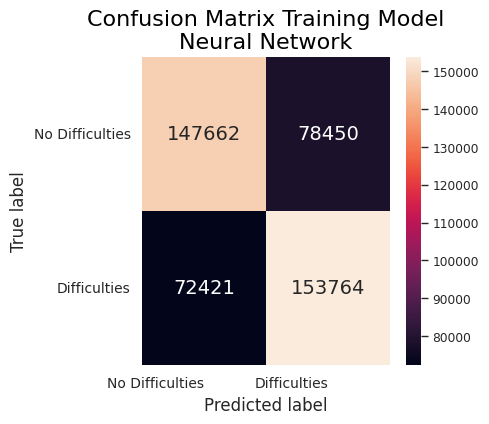

In [ ]:
y_train_pred_nn = nn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Neural Network):')
print(classification_report(y_train, y_train_pred_nn))

confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_nn)), ('No Difficulties', 'Difficulties'), ('No Difficulties', 'Difficulties'))

# plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 14}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix Training Model\nNeural Network', fontsize=16, color='black')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

Classification Report Testing Model (Neural Network):
              precision    recall  f1-score   support

           0       0.67      0.65      0.66     56574
           1       0.66      0.67      0.66     56501

    accuracy                           0.66    113075
   macro avg       0.66      0.66      0.66    113075
weighted avg       0.66      0.66      0.66    113075



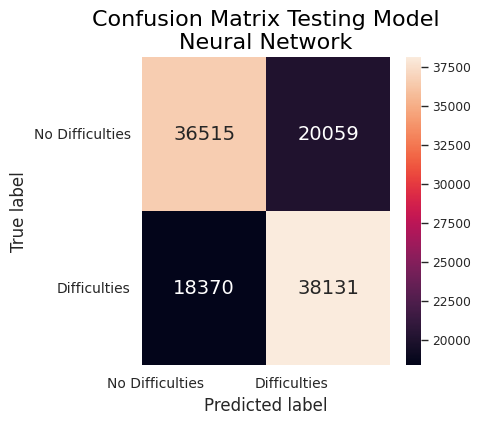

In [ ]:
y_test_pred_nn = nn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Neural Network):')
print(classification_report(y_test, y_test_pred_nn))

confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_nn)), ('No Difficulties', 'Difficulties'), ('No Difficulties', 'Difficulties'))

# plot confusion matrix
plt.figure(figsize=(4,4))
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 14}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)

plt.title('Confusion Matrix Testing Model\nNeural Network', fontsize=16, color='black')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
acc_nn_train=round(nn_model.score(X_train,y_train)*100,2)
acc_nn_test=round(nn_model.score(X_test,y_test)*100,2)
print(f"Training Accuracy: {acc_nn_train} %")
print(f"Test Accuracy: {acc_nn_test} %")

roc_auc_nn = round(roc_auc_score(y_test, y_test_pred_nn),4)
print('ROC AUC:', roc_auc_nn)

Training Accuracy: 66.64 %
Test Accuracy: 66.01 %
ROC AUC: 0.6602


### **Model Selection**

In [ ]:
#numbers gained from model
summary=pd.DataFrame([['Logistic Regression',0.6368, 0.6346, 0.6346],
                      ['Gaussian Native Bayes', 0.5788, 0.5798, 0.58],
                      ['Decision Tree', 1, 0.8562, 0.8563],
                      ['Random Forest', 1, 0.997, 0.997],
                      ['K-Nearest Neighbors', 0.9123, 0.874, 0.874],
                      ['Neural Network', 0.6664, 0.6601, 0.6602]],
                     columns=['Models','Training Accuracy','Testing Accuracy', 'ROC AUC Score'])

summary.sort_values(by=['Training Accuracy', 'Testing Accuracy'], ascending=False).reset_index(drop=True)

,Models,Training Accuracy,Testing Accuracy,ROC AUC Score
0,Random Forest,1.0000,0.9970,0.9970
1,Decision Tree,1.0000,0.8562,0.8563
2,K-Nearest Neighbors,0.9123,0.8740,0.8740
3,Neural Network,0.6664,0.6601,0.6602
4,Logistic Regression,0.6368,0.6346,0.6346
5,Gaussian Native Bayes,0.5788,0.5798,0.5800


##### Random Forest Model Has Been Chosen

# **Data Test**

##### Read Data Application Test

In [ ]:
app_test=pd.read_csv('application_test.csv')

In [ ]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## **Data Preprocessing**

##### Checking Missing Value

,colnames,null_pct
0,COMMONAREA_AVG,68.72
1,COMMONAREA_MODE,68.72
2,COMMONAREA_MEDI,68.72
3,NONLIVINGAPARTMENTS_AVG,68.41
4,NONLIVINGAPARTMENTS_MODE,68.41


<Axes: >

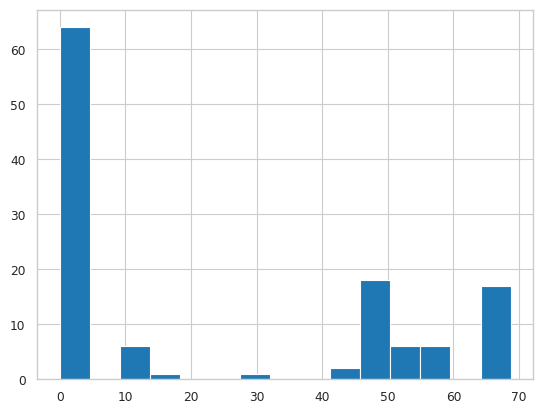

In [ ]:
display(percentMiss(app_test).head())
percentMiss(app_test).null_pct.hist(bins=15)

In [ ]:
#remove >25 missing values
test_25=percentMiss(app_test).loc[percentMiss(app_test)['null_pct']<=25]
used_col_test=list(test_25['colnames'])

test_clean_1=app_test[used_col_test]

In [ ]:
miss_col_test=list(test_clean_1.isna().sum().loc[lambda x: x>0].index)
test_clean_1[miss_col_test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EXT_SOURCE_3                40076 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_DAY   42695 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_WEEK  42695 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_HOUR  42695 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_MON   42695 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_QRT   42695 non-null  float64
 6   AMT_REQ_CREDIT_BUREAU_YEAR  42695 non-null  float64
 7   NAME_TYPE_SUITE             47833 non-null  object 
 8   DEF_30_CNT_SOCIAL_CIRCLE    48715 non-null  float64
 9   OBS_30_CNT_SOCIAL_CIRCLE    48715 non-null  float64
 10  OBS_60_CNT_SOCIAL_CIRCLE    48715 non-null  float64
 11  DEF_60_CNT_SOCIAL_CIRCLE    48715 non-null  float64
 12  AMT_ANNUITY                 48720 non-null  float64
 13  EXT_SOURCE_2                487

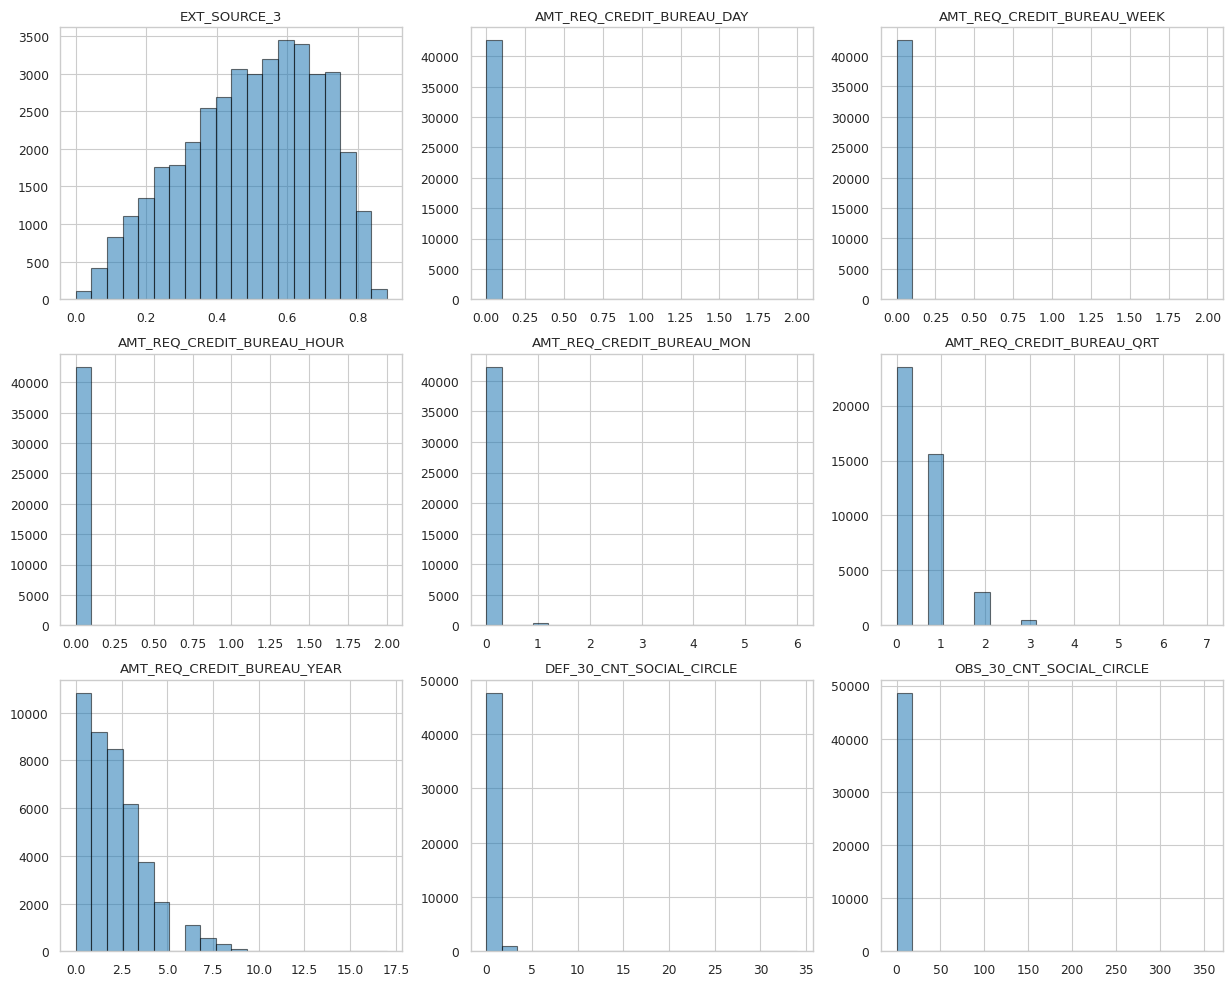

In [ ]:
num_miss_test= test_clean_1[miss_col_test].select_dtypes(exclude = ['object']).columns.tolist()
#plotting part 1
sns.set_style('whitegrid')
fig, ax = plt.subplots(3,3, figsize = (15,12))
sns.set_context('paper', font_scale = 1)

for i in range(0,3):
  for j in range(0,3):
    ax[i][j].hist(test_clean_1[num_miss_test[3*i+j]], bins=20, edgecolor='black', alpha=0.55)
    ax[i][j].set_title(f'{num_miss_test[3*i+j]}')

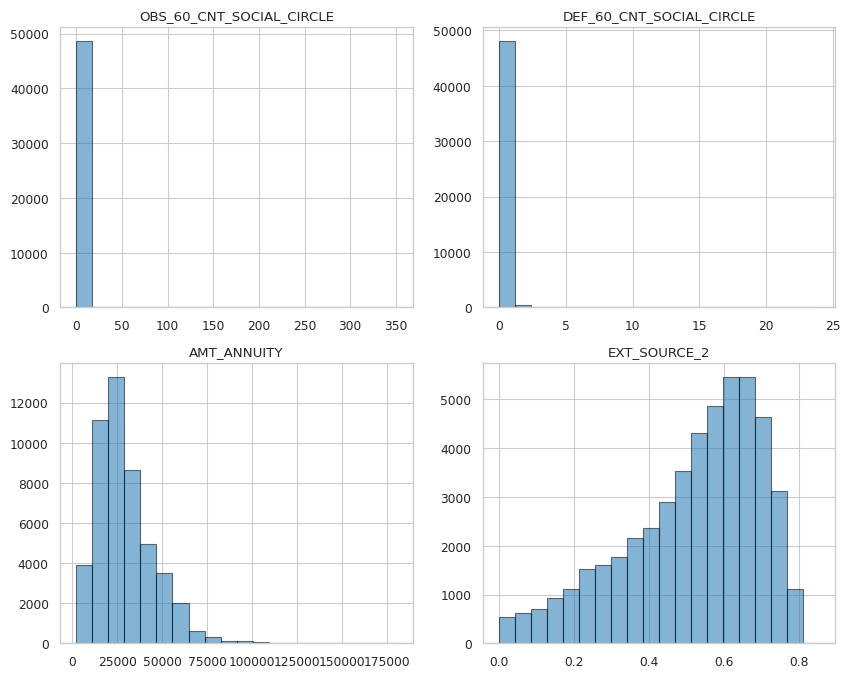

In [ ]:
#plotting part 2
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize = (10,8))
sns.set_context('paper', font_scale = 1)

for i in range(0,2):
  for j in range(0,2):
    ax[i][j].hist(test_clean_1[num_miss_test[9+2*i+j]], bins=20, edgecolor='black', alpha=0.55)
    ax[i][j].set_title(f'{num_miss_test[9+2*i+j]}')

Because the distributions are skewed, numeric missing value will be filled by **median**.

##### Handling Missing Value

In [ ]:
test_clean_2=test_clean_1.copy(deep=True)
num_test=test_clean_2.select_dtypes(exclude = ['object']).columns.tolist()
cat_test=test_clean_2.select_dtypes(include = ['object']).columns.tolist()

for col in test_clean_2:
  if test_clean_2[col].isnull().any():
    if (col in num_test):
      test_clean_2[col].fillna(test_clean_2[col].median(), inplace=True)
    else:
      test_clean_2[col].fillna(test_clean_2[col].mode()[0],inplace=True)

sum(test_clean_2.isnull().sum()) #check if there any null values left. 0= no null values

0

In [ ]:
#Check Duplicate data
test_clean_2.duplicated().sum()

0

## **Machine Learning**

##### Data Test Fix

In [ ]:
test_fix=test_clean_2.copy(deep=True)

##### Label Encoding

In [ ]:
test_fix[cat_test]=test_fix[cat_test].apply(LabelEncoder().fit_transform)
test_fix.head(3)

,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_TYPE_SUITE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,...,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR
0,0.159520,0.0,0.0,0.0,0.0,0.0,0.0,6,0.0,0.0,...,-812,-5170.0,-2329,-19241,0.018850,1,1,1,6,100001
1,0.432962,0.0,0.0,0.0,0.0,0.0,3.0,6,0.0,0.0,...,-1623,-9118.0,-4469,-18064,0.035792,1,1,4,6,100005
2,0.610991,0.0,0.0,0.0,0.0,1.0,4.0,6,0.0,0.0,...,-3503,-2175.0,-4458,-20038,0.019101,1,1,1,6,100013


In [ ]:
#convert negative value to positive
test_fix=test_fix.abs()

### **Predict Data Test**

In [ ]:
#using important features from training to be used in predicting data test
imp_col=list(importances_rf.index)

test_pred=test_fix[imp_col]
test_pred.head()

,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,CODE_GENDER,NAME_INCOME_TYPE,ORGANIZATION_TYPE,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,AMT_ANNUITY,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_BIRTH,EXT_SOURCE_2
0,0,0,0,6,28,450000.0,135000.0,568800.0,1740.0,2329,20560.5,5170.0,812,19241,0.789654
1,0,0,1,6,42,180000.0,99000.0,222768.0,0.0,4469,17370.0,9118.0,1623,18064,0.291656
2,0,0,1,6,54,630000.0,202500.0,663264.0,856.0,4458,69777.0,2175.0,3503,20038,0.699787
3,0,0,0,6,5,1575000.0,315000.0,1575000.0,1805.0,1866,49018.5,2000.0,4208,13976,0.509677
4,0,1,1,6,5,625500.0,180000.0,625500.0,821.0,2191,32067.0,4000.0,4262,13040,0.425687


In [ ]:
predict = pd.Series(rf_model.predict(test_pred), name = "TARGET").astype(int)
results = pd.concat([test_fix['SK_ID_CURR'], predict],axis = 1)
#results.to_csv("predict application.csv", index = False)
results.head()